In [1]:
from pymol import cmd
import pandas as pd
import numpy as np
import seaborn as sns
data_path='/Users/vadim/Downloads/'

for i in range(1,10):
    cif=data_path+'ps1_app99_'+str(i)+'/fold_ps1_app99_'+str(i)+'_model_0.cif'
    cmd.load(cif,'app'+str(i))
for i in range(1,3):
    cif=data_path+'i439v_app_'+str(i)+'/fold_i439v_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'i439'+str(i))
for i in range(1,6):
    cif=data_path+'l166p_app_'+str(i)+'/fold_l166p_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'l166'+str(i))
for i in range(1,6):
    cif=data_path+'t147i_app_'+str(i)+'/fold_t147i_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'t147'+str(i))    
for i in range(1,6):
    cif=data_path+'p117l_app_'+str(i)+'/fold_p117l_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'p117'+str(i))    
for i in range(1,4):
    cif=data_path+'r351_app99_'+str(i)+'/fold_r351_app99_'+str(i)+'_model_0.cif'
    cmd.load(cif,'r35'+str(i));
for i in range(1,4):
    cif=data_path+'e280a_app_'+str(i)+'/fold_e280a_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'e280'+str(i));        
for i in range(1,3):
    cif=data_path+'g384a_app_'+str(i)+'/fold_g384a_app_'+str(i)+'_model_0.cif'
    cmd.load(cif,'g384'+str(i));       

In [37]:
seeds=10
muts=['g384','l166','t147','p117','e280','r35','i439','app']
sim=[]
for cif in muts:
    dis=[]
    for i in range(1,seeds):
        try:
            dis1=cmd.get_distance('(/'+cif+str(i)+'///380/ca)','(/'+cif+str(i)+'/B/B/51/ca)')
            dis3=cmd.get_distance('(/'+cif+str(i)+'///382/ca)','(/'+cif+str(i)+'/B/B/49/ca)')
            dis.append(round(dis1,2));dis.append(round(dis2,2));dis.append(dis3)
        except: continue
    sim.append(dis)

<Axes: >

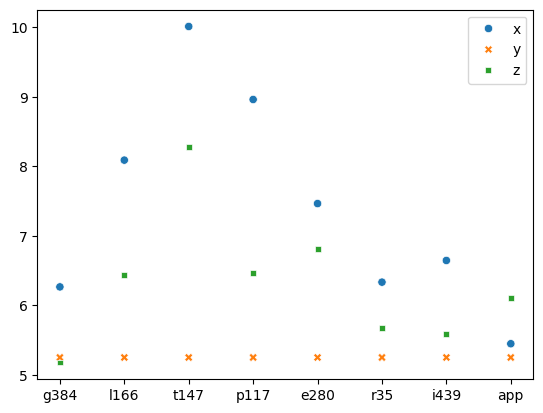

In [38]:
df=pd.DataFrame(sim).T
df.columns=muts
df['s']=[1,2,3]*(seeds-1)
df.index=[i for i in range(1, seeds) for _ in (0,1,2)]
df=df.pivot(columns='s',values=muts)
dg=pd.DataFrame(df.mean()).unstack()
dg.columns=['x','y','z']
sns.scatterplot(data=dg.loc[muts])

In [26]:
df.T

1   2   3   4   5   6   7   8   9
     s                                    
g384 1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     2 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     3 NaN NaN NaN NaN NaN NaN NaN NaN NaN
l166 1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     2 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     3 NaN NaN NaN NaN NaN NaN NaN NaN NaN
t147 1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     2 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     3 NaN NaN NaN NaN NaN NaN NaN NaN NaN
p117 1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     2 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     3 NaN NaN NaN NaN NaN NaN NaN NaN NaN
e280 1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     2 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     3 NaN NaN NaN NaN NaN NaN NaN NaN NaN
r35  1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     2 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     3 NaN NaN NaN NaN NaN NaN NaN NaN NaN
i439 1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     2 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     3 NaN NaN NaN NaN NaN NaN NaN NaN NaN
app  1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     2 NaN NaN NaN NaN NaN NaN NaN NaN NaN
     3 NaN NaN NaN NaN NaN NaN NaN NaN NaN

In [23]:
df

g384                l166                t147                p117  \
s         1         2         1         2         1         2         1   
1  7.245287  7.245287  7.554414  7.554414  6.840152  6.840152  7.135085   
2  7.027714  7.027714  7.083170  7.083170  6.916759  6.916759  7.052920   
3       NaN       NaN  7.477142  7.477142  6.911407  6.911407  6.519604   
4       NaN       NaN  6.757958  6.757958  6.831158  6.831158  6.726115   
5       NaN       NaN  7.140710  7.140710  7.060457  7.060457  6.705214   

                 e280                 r35                i439            \
s         2         1         2         1         2         1         2   
1  7.135085  6.994231  6.994231  6.992362  6.992362  6.796927  6.796927   
2  7.052920  7.064228  7.064228  6.946279  6.946279  6.738380  6.738380   
3  6.519604  7.179729  7.179729  6.872783  6.872783       NaN       NaN   
4  6.726115       NaN       NaN       NaN       NaN       NaN       NaN   
5  6.705214       NaN       NaN       NaN       NaN       NaN       NaN   

        app            
s         1         2  
1  6.891373  6.891373  
2  6.777744  6.777744  
3  6.822002  6.822002  
4  7.206969  7.206969  
5  7.038898  7.038898